In [1]:
import numpy as np
from sklearn import preprocessing,model_selection as cross_validation, neighbors
import pandas as pd

In [3]:
# using Breast Cancer Data 
#Read the breast cancer data from the data file
df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\breast-cancer-wisconsin.data')

In [4]:
#Clean bad data
df.replace('?',-99999, inplace=True) # better strategy is to replace the question marks with the mode of the column 
                                     # here , we are replacing ? with -99999 so that it lies in outlier 
#Drop unwanted columns like id
df.drop(['id'], 1, inplace=True)

In [5]:
#Class needs to be predicted. Remove this from the data frame
X = np.array(df.drop(['class'], 1))
#Class is what needs to be predicted
y = np.array(df['class'])
#Use 20% data for testing and 80% data for training
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#Nearest neighbor classifier from skikit learn
clf = neighbors.KNeighborsClassifier()

In [7]:
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)
#Pass a new measurement and predict
example_measures = np.array([4,2,1,1,1,2,3,2,1]).reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9785714285714285
[2]


In [86]:
# using Titanic Data 

df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\titanic_data.csv')
print(df.head(5))

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [87]:

df = df.drop(['name','ticket','cabin','boat', 'body', 'home.dest'], axis=1)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,C


In [89]:
df.fillna(0, inplace=True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,C


In [90]:
df['sex'].replace(['female','male'],[0,1],inplace=True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,1,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,0,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,1,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,0,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,1,71.0000,0.0,0.0,49.5042,C


In [91]:
df['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,0
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,0
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,0
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,0
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,0
5,1.0,1.0,1,48.0000,0.0,0.0,26.5500,0
6,1.0,1.0,0,63.0000,1.0,0.0,77.9583,0
7,1.0,0.0,1,39.0000,0.0,0.0,0.0000,0
8,1.0,1.0,0,53.0000,2.0,0.0,51.4792,0
9,1.0,0.0,1,71.0000,0.0,0.0,49.5042,1


In [92]:
#Class needs to be predicted. Remove this from the data frame
X = np.array(df.drop(['survived'], 1))
#Class is what needs to be predicted
y = np.array(df['survived'])
#Use 20% data for testing and 80% data for training
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
#Nearest neighbor classifier from skikit learn
clf = neighbors.KNeighborsClassifier()

In [93]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6603053435114504


In [94]:
# SVM ( Support Vector machine)
import numpy as np
from sklearn import preprocessing, model_selection as cross_validation, neighbors, svm
import pandas as pd

In [95]:
#Read data, clean data and drop unwanted features
df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

#Drop prediction class from data set, Add to y
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

#80-20 for train:test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [96]:
clf = svm.SVC()

#Run SVM and calculate confidence
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9428571428571428


In [97]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)



[2]


In [98]:
# using Titanic Data 

df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\titanic_data.csv')
print(df.head(5))

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [99]:
df = df.drop(['name','ticket','cabin','boat', 'body', 'home.dest'], axis=1)
df.fillna(0, inplace=True)
df['sex'].replace(['female','male'],[0,1],inplace=True)
df['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,0
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,0
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,0
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,0
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,0
5,1.0,1.0,1,48.0000,0.0,0.0,26.5500,0
6,1.0,1.0,0,63.0000,1.0,0.0,77.9583,0
7,1.0,0.0,1,39.0000,0.0,0.0,0.0000,0
8,1.0,1.0,0,53.0000,2.0,0.0,51.4792,0
9,1.0,0.0,1,71.0000,0.0,0.0,49.5042,1


In [100]:
#Class needs to be predicted. Remove this from the data frame
X = np.array(df.drop(['survived'], 1))
#Class is what needs to be predicted
y = np.array(df['survived'])
#Use 20% data for testing and 80% data for training
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [101]:
clf = svm.SVC()
#Run SVM and calculate confidence
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.7099236641221374


In [102]:
example_measures = np.array([[1.0,1.0,30.0000,1.0,2.0,50.0000,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[0.]


Optimized a step.
Optimized a step.
Optimized a step.
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864


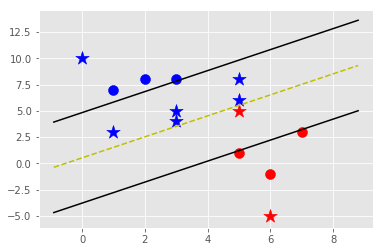

In [104]:
# svm from scratch file 
# it shows the 2 planes drawn on the periphery of 2 classes and support vectoes and how a best plane separates the 2 classes optimally 

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1


        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]



        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        #
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))

                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()

data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),

             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

In [105]:
# Naive Bayes 

#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x, y)

#Predict Output
predicted= model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


In [109]:
#using breast data 
df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\breast-cancer-wisconsin.data')
#Clean bad data
df.replace('?',-99999, inplace=True) # better strategy is to replace the question marks with the mode of the column 
                                     # here , we are replacing ? with -99999 so that it lies in outlier 
#Drop unwanted columns like id
df.drop(['id'], 1, inplace=True)
#Class needs to be predicted. Remove this from the data frame
X = np.array(df.drop(['class'], 1))
#Class is what needs to be predicted
y = np.array(df['class'])
#Use 20% data for testing and 80% data for training
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [111]:
model = GaussianNB()

model.fit(X, y)
predicted = model.predict([[1.0,1.0,30.0000,1.0,2.0,50.0000,1]])
print(predicted)

ValueError: operands could not be broadcast together with shapes (1,7) (9,) 

In [112]:
# Decision Tree 

#using breast cancer data 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


In [113]:
# using titanic data 


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [116]:
df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\titanic_data.csv')
df = df.drop(['name','ticket','cabin','boat', 'body', 'home.dest'], axis=1)
df.fillna(0, inplace=True)
df['sex'].replace(['female','male'],[0,1],inplace=True)
df['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,0
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,0
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,0
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,0
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,0
5,1.0,1.0,1,48.0000,0.0,0.0,26.5500,0
6,1.0,1.0,0,63.0000,1.0,0.0,77.9583,0
7,1.0,0.0,1,39.0000,0.0,0.0,0.0000,0
8,1.0,1.0,0,53.0000,2.0,0.0,51.4792,0
9,1.0,0.0,1,71.0000,0.0,0.0,49.5042,1


In [118]:
X = np.array(df.drop(['survived'], 1))
#Class is what needs to be predicted
y = np.array(df['survived'])
#Use 20% data for testing and 80% data for training
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)



tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.969
Accuracy on the test subset: 0.779


In [119]:
# decision trees from scratch

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["color", "diameter", "label"]


def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

#######
# Demo:
# unique_vals(training_data, 0)
# unique_vals(training_data, 1)
#######


def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

#######
# Demo:
# class_counts(training_data)
#######


def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

#######
# Demo:
# is_numeric(7)
# is_numeric("Red")
#######


class Question:
    """A Question is used to partition a dataset.
    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

#######
# Demo:
# Let's write a question for a numeric attribute
# Question(1, 3)
# How about one for a categorical attribute
# q = Question(0, 'Green')
# Let's pick an example from the training set...
# example = training_data[0]
# ... and see if it matches the question
# q.match(example)
#######


def partition(rows, question):
    """Partitions a dataset.
    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


#######
# Demo:
# Let's partition the training data based on whether rows are Red.
# true_rows, false_rows = partition(training_data, Question(0, 'Red'))
# This will contain all the 'Red' rows.
# true_rows
# This will contain everything else.
# false_rows
#######

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
# no_mixing = [['Apple'],
#              ['Apple']]
# this will return 0
# gini(no_mixing)
#
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
# some_mixing = [['Apple'],
#               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
# gini(some_mixing)
#
# Now, we'll look at a dataset with many different labels
# lots_of_mixing = [['Apple'],
#                  ['Orange'],
#                  ['Grape'],
#                  ['Grapefruit'],
#                  ['Blueberry']]
# This will return 0.8
# gini(lots_of_mixing)
#######

def info_gain(left, right, current_uncertainty):
    """Information Gain.
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

#######
# Demo:
# Calculate the uncertainy of our training data.
# current_uncertainty = gini(training_data)
#
# How much information do we gain by partioning on 'Green'?
# true_rows, false_rows = partition(training_data, Question(0, 'Green'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# What about if we partioned on 'Red' instead?
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
# info_gain(true_rows, false_rows, current_uncertainty)
#
# It looks like we learned more using 'Red' (0.37), than 'Green' (0.14).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
#
# Here, the true_rows contain only 'Grapes'.
# true_rows
#
# And the false rows contain two types of fruit. Not too bad.
# false_rows
#
# On the other hand, partitioning by Green doesn't help so much.
# true_rows, false_rows = partition(training_data, Question(0,'Green'))
#
# We've isolated one apple in the true rows.
# true_rows
#
# But, the false-rows are badly mixed up.
# false_rows
#######


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

#######
# Demo:
# Find the best question to ask first for our toy dataset.
# best_gain, best_question = find_best_split(training_data)
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

class Leaf:
    """A Leaf node classifies data.
    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)


class Decision_Node:
    """A Decision Node asks a question.
    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


def build_tree(rows):
    """Builds the tree.
    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
# my_tree = build_tree(training_data)
# classify(training_data[0], my_tree)
#######

def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


#######
# Demo:
# Printing that a bit nicer
# print_leaf(classify(training_data[0], my_tree))
#######

#######
# Demo:
# On the second example, the confidence is lower
# print_leaf(classify(training_data[1], my_tree))
#######

if __name__ == '__main__':

    my_tree = build_tree(training_data)

    print_tree(my_tree)

    # Evaluate
    testing_data = [
        ['Green', 3, 'Apple'],
        ['Yellow', 4, 'Apple'],
        ['Red', 2, 'Grape'],
        ['Red', 1, 'Grape'],
        ['Yellow', 3, 'Lemon'],
    ]

    for row in testing_data:
        print ("Actual: %s. Predicted: %s" %
               (row[-1], print_leaf(classify(row, my_tree))))

# Next steps
# - add support for missing (or unseen) attributes
# - prune the tree to prevent overfitting
# - add support for regression

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Lemon': 1, 'Apple': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}
Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


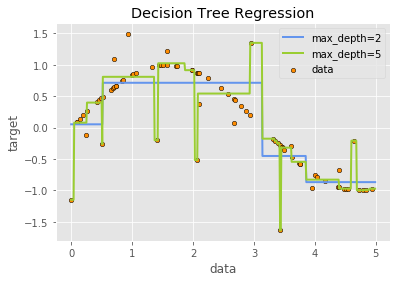

In [120]:
# Decision tree for regression 
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()